In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd 'drive/MyDrive/Artigo_Farmacos/'

/content/drive/MyDrive/Artigo_Farmacos


In [ ]:
!pip install hydroeval

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
import glob
import seaborn as sns
import re
import os
import itertools
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.preprocessing import  LabelEncoder
import hydroeval as he
pd.options.display.float_format = '{:.4f}'.format


def fmt(x):
    if (type(x) == str or type(x) == tuple or type(x) == list):
        return str(x)
    else:
      if (abs(x)>0.001 and abs(x)<1e4):
        return '%1.3f' % x
      else:
        return '%1.4g' % x

def fstat(x):
  #m,s= '{:1.4g}'.format(np.mean(x)), '{:1.4g}'.format(np.std(x))
  m,s, md= fmt(np.mean(x)), fmt(np.std(x)), fmt(np.median(x))
  #text=str(m)+'$\pm$'+str(s)
  text=str(m)+' ('+str(s)+')'#+' ['+str(md)+']'
  return text

# http://www.jesshamrick.com/2016/04/13/reproducible-plots/
def set_style():
    # This sets reasonable defaults for size for
    # a figure that will go in a paper
    #sns.set_context("paper")
    #pl.style.use(['seaborn-white', 'seaborn-paper'])
    #matplotlib.rc("font", family="Times New Roman")
    #sns.set_palette("Greys", 1, 0.99, )
    sns.set_palette("Blues_d", 1, 0.99, )
    sns.set_context("paper", font_scale=1.2,
        rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12,
            'xtick.labelsize':14,'ytick.labelsize':14,
            'font.family':"Times New Roman", })
    # Set the font to be serif, rather than sans
    #sns.set(font='serif', font_scale=1.4,)

    # Make the background white, and specify the
    # specific font family
    sns.set_style(style="white", rc={
        #"font.family": "serif",
        #"font.serif": ["Times", "Palatino", "serif"]
    })

    #pl.rc('text', usetex=True)
    #pl.rc('font', family='serif',  serif='Times')

    #sns.set(style="ticks", palette="mutedpd", color_codes=True, font_scale=1.4,)

def replace_names(s):
    sv = [
            ('gamma', '$\gamma$'), ('epsilon','$\\varepsilon$'), ('C', '$C$'),
            ('l1_ratio','$L_1$ ratio'), ('alpha','$\\alpha$'),
            ('l2_penalty','$C_2$'),
            ('thin_plate','T. Plate'),('cubic','Cubic'),
            ('inverse','Inverse'),('quintic','Quintic'),('linear','Linear'),
            ('penalty','$\gamma$'),('max_degree','$q$'),
            ('hidden_layer_sizes', 'HL'),
            ('learning_rate_init', 'LR'),
            ('rbf_width', '$\gamma$'),
            ('activation_func', '$G$'),
            ('activation', '$\\varphi$'),
            ('n_hidden', 'HL'),
            ('sigmoid', 'Sigmoid'),
            ('inv_multiquadric', 'Inv. Multiquadric'),
            ('multiquadric', 'Multiquadric'),
            ('hardlim', 'HardLim'),('softlim', 'SoftLim'),
            ('tanh', 'Hyp. Tangent'),
            ('gaussian', 'Gaussian'),
            ('identity', 'Identity'),
            ('swish', 'Swish'),
            ('relu', 'ReLU'),
            ('Kappa', '$\kappa$'),
            ('criterion','Criterion'),
            ('learning_rate','LR'),
            ('friedman_mse','MSE'),
            ('reg_lambda','$\lambda$'),
            ('max_depth','Max. Depth'),
            ('min_samples_leaf','Min. Samples Leaf'),
            ('min_samples_split','Min. Samples Split'),
            ('min_weight_fraction_leaf', 'Min. Weig. Fract. Leaf'),
            ('n_estimators', 'No Estimators'),
            ('presort', 'Presort'),
            ('subsample', 'Subsample'),
            ('n_neighbors','$K$'),
            ('positive','Positive Weights'),
            ('max_terms','Max. Terms'),
            ('max_iter','Max. Iter.'),
            ('min_child_weight','Min. Child Weight'),
            ('colsample_bytree','Col. Sample'),
            ('thin_plate', 'thin-plate'),
            ('interaction_only','Interaction Only'),
            ('k1','$k_0$'),
            ('sigma', '$\sigma$'), ('beta', '$\\beta$'),
            ('U/u*','$U/u^*$'),
            ('B','$B$'),('H','$H$'),('U','$U$'),('u*','$u^*$'),
        ]
    for s1,s2 in sv:
        r=s.replace(str(s1), s2)
        if(r!=s):
            #print r
            return r
    return r


In [ ]:
set_style()


basename='Farmacos'


pkl_list  = []
pkl_list += glob.glob('pkl_novo/*')
pkl_list.sort()
#

# leitura dos dados
#
A=[]
for pkl in pkl_list:
    df = pd.read_pickle(pkl)
    A.append(df)


#
A = pd.concat(A,axis=0)
#



C = []
for k in range(len(A)):
    df=A.iloc[k]

    y_true = pd.DataFrame(df['Y_TRUE'], columns=['Class'])
    run = df['RUN']

    y_pred = pd.DataFrame(df['Y_PRED'], columns=['Class'])

    run = df['RUN']
    ds_name = df['DATASET']

    var_names = y_true.columns

    for v in var_names:
        r2      = r2_score(y_true[v], y_pred[v])
        mae     = mean_absolute_error(y_true[v], y_pred[v])
        mse     = mean_squared_error(y_true[v], y_pred[v])
        mape    = abs((y_true[v] - y_pred[v])/y_true[v]).mean()*100
        rmse    = he.rmse(y_true.values, y_pred.values)[0]
        C.append({'RUN':run, 'Output':v,
                  'Dataset':ds_name,
                  'MAPE':mape, 'R$^2$':r2, 'MSE':mse,
                  'RMSE':rmse, 'MAE':mae,
                  'Parameters':df['BEST_PARAMS'],
                  'Estimator':df['MODEL'],'Y_PRED':y_true.values, 'Y_TRUE':y_true.values})


C = pd.DataFrame(C)



In [ ]:
metrics = ['MAPE', 'R$^2$', 'MSE', 'RMSE','MAE']

In [ ]:
for (c,o), df in C.groupby(['Estimator','Output']):
    print(df)

      RUN Output   Dataset   MAPE  R$^2$    MSE   RMSE    MAE  \
0       0  Class  farmacos 3.3615 0.8863 0.0004 0.0199 0.0148   
1       0  Class  farmacos 3.3615 0.8863 0.0004 0.0199 0.0148   
5       1  Class  farmacos 3.2892 0.9070 0.0004 0.0198 0.0143   
9       2  Class  farmacos 3.4222 0.8955 0.0004 0.0195 0.0150   
13      3  Class  farmacos 3.1843 0.8989 0.0004 0.0196 0.0141   
...   ...    ...       ...    ...    ...    ...    ...    ...   
7241    5  Class  farmacos    inf 0.9043 0.0004 0.0194 0.0143   
7245    6  Class  farmacos 3.3302 0.8906 0.0004 0.0198 0.0146   
7249    7  Class  farmacos 3.0551 0.9095 0.0003 0.0182 0.0135   
7253    8  Class  farmacos 3.1992 0.8940 0.0004 0.0197 0.0141   
7257    9  Class  farmacos 3.3620 0.8973 0.0004 0.0206 0.0147   

                               Parameters Estimator  \
0     {'n_neurons': 200, 'ufunc': 'relu'}       ELM   
1     {'n_neurons': 200, 'ufunc': 'relu'}       ELM   
5     {'n_neurons': 200, 'ufunc': 'relu'}       ELM   

In [ ]:
for (c,o), df in C.groupby(['Estimator','Output']):
    g=df['Parameters']
    par= pd.DataFrame(list(g))
    par['Estimator']=c[0]
    par['Output'] = c[1]
    aux=par.copy()
    print ('='*80,'\n',c,'\n','='*80,'\n',df[metrics],'\n','='*80)
    print('Media'+'\n'+str(df[metrics].mean()))
    print('Desvio Padrao'+'\n'+str(df[metrics].std()))

 ELM 
        MAPE  R$^2$    MSE   RMSE    MAE
0    3.3615 0.8863 0.0004 0.0199 0.0148
1    3.3615 0.8863 0.0004 0.0199 0.0148
5    3.2892 0.9070 0.0004 0.0198 0.0143
9    3.4222 0.8955 0.0004 0.0195 0.0150
13   3.1843 0.8989 0.0004 0.0196 0.0141
...     ...    ...    ...    ...    ...
7241    inf 0.9043 0.0004 0.0194 0.0143
7245 3.3302 0.8906 0.0004 0.0198 0.0146
7249 3.0551 0.9095 0.0003 0.0182 0.0135
7253 3.1992 0.8940 0.0004 0.0197 0.0141
7257 3.3620 0.8973 0.0004 0.0206 0.0147

[1860 rows x 5 columns] 
Media
MAPE       inf
R$^2$   0.8888
MSE     0.0004
RMSE    0.0203
MAE     0.0145
dtype: float64
Desvio Padrao
MAPE       NaN
R$^2$   0.0468
MSE     0.0002
RMSE    0.0032
MAE     0.0005
dtype: float64
 KNN 
        MAPE  R$^2$    MSE   RMSE    MAE
4    3.5097 0.8478 0.0005 0.0230 0.0156
8    3.6266 0.8592 0.0006 0.0243 0.0161
12   3.4461 0.8666 0.0005 0.0221 0.0152
16   3.4310 0.8562 0.0005 0.0234 0.0155
20   3.5282 0.8352 0.0006 0.0245 0.0156
...     ...    ...    ...    ...    ...


In [ ]:

#melhores parâmetros e metricas RF
df_rf = C[C['Estimator']=='RF']
df_rf.sort_values(['RMSE'])
best_parameters_rf = df_rf[df_rf.index == 6305]['Parameters']
rmse_rf = df_rf[df_rf.index == 6305]['RMSE']
mse_rf = df_rf[df_rf.index == 6305]['MSE']
mae_rf = df_rf[df_rf.index == 6305]['MAE']
r2_rf = df_rf[df_rf.index == 6305]['R$^2$']
mape_rf = df_rf[df_rf.index == 6305]['MAPE']


print(df_rf.sort_values(['RMSE']))
print('RF'+'\n'+'Parameters'+str(best_parameters_rf.values )+'\n'+'RMSE'+'\n'+str(rmse_rf.values )+'\n'+'MSE'+str(mse_rf.values )+'\n'+'MAE'+str(mae_rf.values )+'\n'+'R$^2$'+str(r2_rf.values )+'\n'+'MAPE'+'\n'+str(mape_rf.values ))



      RUN Output   Dataset   MAPE  R$^2$    MSE   RMSE    MAE  \
6305   21  Class  farmacos 2.6054 0.9167 0.0003 0.0171 0.0114   
1227   21  Class  farmacos 2.6054 0.9167 0.0003 0.0171 0.0114   
2847   21  Class  farmacos 2.6054 0.9167 0.0003 0.0171 0.0114   
4581   21  Class  farmacos 2.6054 0.9167 0.0003 0.0171 0.0114   
4491   21  Class  farmacos 2.6054 0.9167 0.0003 0.0171 0.0114   
...   ...    ...       ...    ...    ...    ...    ...    ...   
6863    9  Class  farmacos 2.9437 0.8732 0.0005 0.0228 0.0129   
6348    9  Class  farmacos 2.9437 0.8732 0.0005 0.0228 0.0129   
4117    9  Class  farmacos 2.9437 0.8732 0.0005 0.0228 0.0129   
6087    9  Class  farmacos 2.9437 0.8732 0.0005 0.0228 0.0129   
7258    9  Class  farmacos 2.9437 0.8732 0.0005 0.0228 0.0129   

                                             Parameters Estimator  \
6305  {'max_depth': 15, 'min_samples_leaf': 2, 'min_...        RF   
1227  {'max_depth': 15, 'min_samples_leaf': 2, 'min_...        RF   
2847  {'max_

In [ ]:
#melhores parâmetros e metricas SVR
df_svr = C[C['Estimator']=='SVR']
df_svr.sort_values(['RMSE'])
best_parameters_svr = df_svr[df_svr.index ==848]['Parameters']
rmse_svr = df_svr[df_svr.index == 848]['RMSE']
mse_svr = df_svr[df_svr.index == 848]['MSE']
mae_svr = df_svr[df_svr.index == 848]['MAE']
r2_svr = df_svr[df_svr.index == 848]['R$^2$']
mape_svr = df_svr[df_svr.index == 848]['MAPE']

print(df_svr.sort_values(['RMSE']))
print('SVR'+'\n'+'Parameters'+str(best_parameters_svr.values )+'\n'+'RMSE'+'\n'+str(rmse_svr.values )+'\n'+'MSE'+str(mse_svr.values )+'\n'+'MAE'+str(mae_svr.values )+'\n'+'R$^2$'+str(r2_svr.values )+'\n'+'MAPE'+str(mape_svr.values ))

      RUN Output   Dataset   MAPE  R$^2$    MSE   RMSE    MAE  \
848    21  Class  farmacos 5.3135 0.7392 0.0009 0.0303 0.0239   
4982   21  Class  farmacos 5.3135 0.7392 0.0009 0.0303 0.0239   
1030   21  Class  farmacos 5.3135 0.7392 0.0009 0.0303 0.0239   
2572   21  Class  farmacos 5.3135 0.7392 0.0009 0.0303 0.0239   
1442   21  Class  farmacos 5.3135 0.7392 0.0009 0.0303 0.0239   
...   ...    ...       ...    ...    ...    ...    ...    ...   
430    14  Class  farmacos    inf 0.6526 0.0014 0.0378 0.0259   
4746   14  Class  farmacos    inf 0.6526 0.0014 0.0378 0.0259   
2224   14  Class  farmacos    inf 0.6526 0.0014 0.0378 0.0259   
365    14  Class  farmacos    inf 0.6526 0.0014 0.0378 0.0259   
4848   14  Class  farmacos    inf 0.6526 0.0014 0.0378 0.0259   

                Parameters Estimator  \
848   {'C': 1, 'gamma': 1}       SVR   
4982  {'C': 1, 'gamma': 1}       SVR   
1030  {'C': 1, 'gamma': 1}       SVR   
2572  {'C': 1, 'gamma': 1}       SVR   
1442  {'C': 1, 'gam

In [ ]:

#melhores parâmetros e metricas ELM
df_elm = C[C['Estimator']=='ELM']
df_elm.sort_values(['RMSE'])
best_parameters_elm = df_elm[df_elm.index == 5917]['Parameters']
rmse_elm = df_elm[df_elm.index == 5917]['RMSE']
mse_elm = df_elm[df_elm.index == 5917]['MSE']
mae_elm = df_elm[df_elm.index == 5917]['MAE']
r2_elm = df_elm[df_elm.index == 5917]['R$^2$']
mape_elm = df_elm[df_elm.index == 5917]['MAPE']


print(df_elm.sort_values(['RMSE']))
print('ELM'+'\n'+'Parameters'+str(best_parameters_elm.values )+'\n'+'RMSE'+'\n'+str(rmse_elm.values )+'\n'+'MSE'+str(mse_elm.values )+'\n'+'MAE'+str(mae_elm.values )+'\n'+'R$^2$'+str(r2_elm.values )+'\n'+'MAPE'+'\n'+str(mape_elm.values ))



      RUN Output   Dataset   MAPE  R$^2$    MSE   RMSE    MAE  \
5917    7  Class  farmacos 3.0551 0.9095 0.0003 0.0182 0.0135   
4524    7  Class  farmacos 3.0551 0.9095 0.0003 0.0182 0.0135   
1497    7  Class  farmacos 3.0551 0.9095 0.0003 0.0182 0.0135   
5504    7  Class  farmacos 3.0551 0.9095 0.0003 0.0182 0.0135   
4434    7  Class  farmacos 3.0551 0.9095 0.0003 0.0182 0.0135   
...   ...    ...       ...    ...    ...    ...    ...    ...   
5050   11  Class  farmacos 3.9832 0.6651 0.0013 0.0357 0.0162   
2806   11  Class  farmacos 3.9832 0.6651 0.0013 0.0357 0.0162   
2906   11  Class  farmacos 3.9832 0.6651 0.0013 0.0357 0.0162   
6759   11  Class  farmacos 3.9832 0.6651 0.0013 0.0357 0.0162   
2078   11  Class  farmacos 3.9832 0.6651 0.0013 0.0357 0.0162   

                               Parameters Estimator  \
5917  {'n_neurons': 200, 'ufunc': 'relu'}       ELM   
4524  {'n_neurons': 200, 'ufunc': 'relu'}       ELM   
1497  {'n_neurons': 200, 'ufunc': 'relu'}       ELM   

In [ ]:

#melhores parâmetros e metricas KNN
df_knn = C[C['Estimator']=='KNN']
df_knn.sort_values(['RMSE'])
best_parameters_knn = df_knn[df_knn.index == 1785]['Parameters']
rmse_knn = df_knn[df_knn.index == 1785]['RMSE']
mse_knn = df_knn[df_knn.index == 1785]['MSE']
mae_knn = df_knn[df_knn.index == 1785]['MAE']
r2_knn = df_knn[df_knn.index == 1785]['R$^2$']
mape_knn = df_knn[df_knn.index == 1785]['MAPE']


print(df_knn.sort_values(['RMSE']))
print('ELM'+'\n'+'Parameters'+str(best_parameters_knn.values )+'\n'+'RMSE'+'\n'+str(rmse_knn.values )+'\n'+'MSE'+str(mse_knn.values )+'\n'+'MAE'+str(mae_knn.values )+'\n'+'R$^2$'+str(r2_knn.values )+'\n'+'MAPE'+'\n'+str(mape_knn.values ))



      RUN Output   Dataset   MAPE  R$^2$    MSE   RMSE    MAE  \
1785    2  Class  farmacos 3.4461 0.8666 0.0005 0.0221 0.0152   
2497    2  Class  farmacos 3.4461 0.8666 0.0005 0.0221 0.0152   
688     2  Class  farmacos 3.4461 0.8666 0.0005 0.0221 0.0152   
6144    2  Class  farmacos 3.4461 0.8666 0.0005 0.0221 0.0152   
5131    2  Class  farmacos 3.4461 0.8666 0.0005 0.0221 0.0152   
...   ...    ...       ...    ...    ...    ...    ...    ...   
3763   10  Class  farmacos    inf 0.8314 0.0007 0.0265 0.0170   
4197   10  Class  farmacos    inf 0.8314 0.0007 0.0265 0.0170   
6758   10  Class  farmacos    inf 0.8314 0.0007 0.0265 0.0170   
6869   10  Class  farmacos    inf 0.8314 0.0007 0.0265 0.0170   
4123   10  Class  farmacos    inf 0.8314 0.0007 0.0265 0.0170   

              Parameters Estimator  \
1785  {'n_neighbors': 3}       KNN   
2497  {'n_neighbors': 3}       KNN   
688   {'n_neighbors': 3}       KNN   
6144  {'n_neighbors': 3}       KNN   
5131  {'n_neighbors': 3}     

In [ ]:
primeiro_quartil = C[['MSE','RMSE','R$^2$']].quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = C[['MSE','RMSE','R$^2$']].quantile(q=0.75, axis=0, numeric_only=True)

In [ ]:
menor = primeiro_quartil[['MSE','RMSE','R$^2$']] - (terceiro_quartil[['MSE','RMSE','R$^2$']] - primeiro_quartil[['MSE','RMSE','R$^2$']])*1.5
maior = terceiro_quartil[['MSE','RMSE','R$^2$']] + (terceiro_quartil[['MSE','RMSE','R$^2$']] - primeiro_quartil[['MSE','RMSE','R$^2$']])*1.5

In [ ]:
menor

MSE     -0.2019
RMSE     0.4200
R$^2$    0.6393
dtype: float64

In [ ]:
C[C['MSE'] < menor['MSE']]

,RUN,Output,Dataset,MAPE,R$^2$,MSE,RMSE,MAE,Parameters,Estimator,Y_PRED,Y_TRUE


In [ ]:
C[C['R$^2$'] < menor['R$^2$']].index

Index([  10,   11,   16,   25,   38,   55,  169,  186,  207,  232,  261,  424,
        446,  450,  458,  470,  486,  630,  650,  674,  702,  734,  910,  912,
        918,  928,  942, 1064, 1082, 1104, 1130, 1160, 1330, 1352, 1355, 1362,
       1373, 1388, 1521, 1540, 1563, 1590, 1621],
      dtype='int64')

In [ ]:
C[C['RMSE'] > maior['RMSE']].index

Index([  10,   11,   16,   25,   38,   55,  169,  186,  207,  232,  261,  424,
        446,  450,  458,  470,  486,  630,  650,  674,  702,  734,  910,  912,
        918,  928,  942, 1064, 1082, 1104, 1130, 1160, 1330, 1352, 1355, 1362,
       1373, 1388, 1521, 1540, 1563, 1590, 1621],
      dtype='int64')

In [ ]:
C[C['MSE'] > maior['MSE']].index

Index([  10,   11,   16,   25,   38,   55,  169,  186,  207,  232,  261,  424,
        446,  450,  458,  470,  486,  630,  650,  674,  702,  734,  910,  912,
        918,  928,  942, 1064, 1082, 1104, 1130, 1160, 1330, 1352, 1355, 1362,
       1373, 1388, 1521, 1540, 1563, 1590, 1621],
      dtype='int64')

In [ ]:
C[C['R$^2$'] > maior[ 'R$^2$']]

,RUN,Output,Dataset,MAPE,R$^2$,MSE,RMSE,MAE,Parameters,Estimator,Y_PRED,Y_TRUE


In [ ]:
C=C.drop(index=[10,   11,   16,   25,   38,   55,  169,  186,  207,  232,  261,  424,
        446,  450,  458,  470,  486,  630,  650,  674,  702,  734,  910,  912,
        918,  928,  942, 1064, 1082, 1104, 1130, 1160, 1330, 1352, 1355, 1362,
       1373, 1388, 1521, 1540, 1563, 1590, 1621])

<ipython-input-14-b44c46913395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(y=f, data=C, x='Estimator', kind='box',
<ipython-input-14-b44c46913395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(y=f, data=C, x='Estimator', kind='box',
<ipython-input-14-b44c46913395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.catplot(y=f, data=C, x='Estimator', kind='box',
<ipython-input-14-b44c46913395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

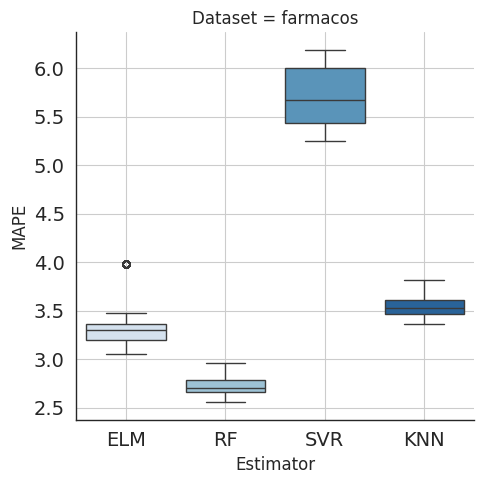

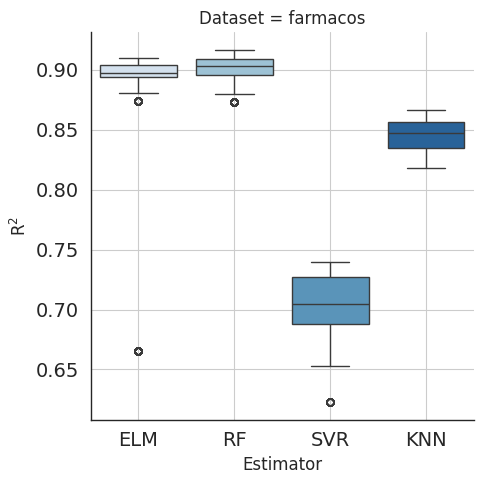

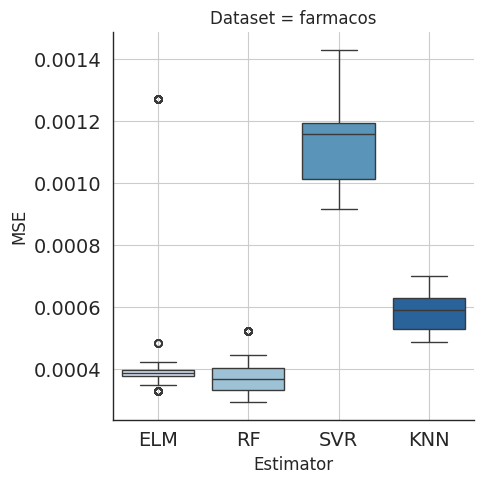

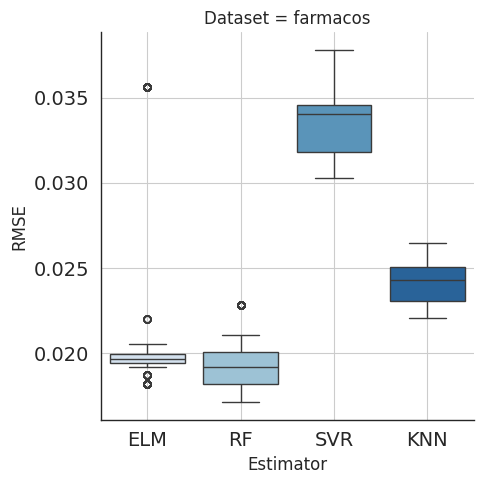

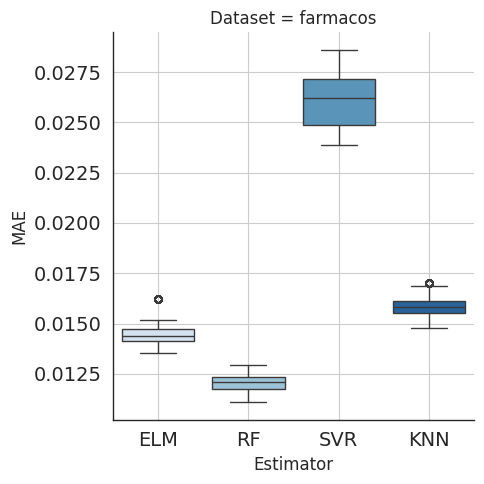

In [ ]:
for f in metrics:
  g=sns.catplot(y=f, data=C, x='Estimator', kind='box',
                   col='Dataset',
                   notch=0, sharey=False,palette="Blues")
  #fn = basename+'_'+f+'_both_boxplot'+'.png'
  #g.savefig(re.sub('\^','', re.sub('\$','',fn) ), dpi=650,bbox_inches='tight')
  pl.grid()
  #pl.show()

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
np.unique(C[C['Estimator']=='KNN']['RMSE'].values).shape

(30,)

In [ ]:
for i in ['ELM','KNN','SVR']:
  res= wilcoxon(np.unique(C[C['Estimator']=='RF']['R$^2$'].values),np.unique(C[C['Estimator']==i]['R$^2$'].values)[0:30])
  print(i,res.statistic, res.pvalue,'\n')

ELM 0.0 1.862645149230957e-09 

KNN 0.0 1.862645149230957e-09 

SVR 0.0 1.862645149230957e-09 



In [ ]:
import seaborn as sns

In [ ]:
#%%
parameters=pd.DataFrame()
for (d,e,o), df in C[0:124].groupby(['Dataset','Estimator','Output']):
  #if e!= ref_estimator:
    print (d+'\t\t'+e+'\t'+str(len(df)))
    aux={}
    par = pd.DataFrame(list(df['Parameters']))
    if e=='RBFNN':
        #par['hidden_layer_sizes']=[len(j) for j in par['hidden_layer_sizes']]
        _t=['func',]
        for t in _t:
            par[t] = [replace_names(i) for i in par[t].values]

        #print(par); print('\n\n\n\n\n')

    if e=='MLP':
        par['hidden_layer_sizes']=[len(j) for j in par['hidden_layer_sizes']]
        _t=['activation',]
        for t in _t:
            par[t] = [replace_names(i) for i in par[t].values]

    if  e=='ELM':
        #par.drop(['regressor'], axis=1, inplace=True)
        _t=['ufunc',]
        for t in _t:
            par[t] = [replace_names(i) for i in par[t].values]

    if  e=='SVR' or e=='SVR-L':
        _t=['loss',]
        #for t in _t:
            #par[t] = [replace_names(i) for i in par[t].values]

    if  e=='XGB':
        #par.drop(['objective'], axis=1, inplace=True)
        print(par)

    if  e=='SVR' or e=='SVR-FS':
        par['gamma'] = [0 if a=='scale' else a for a in par['gamma']]
        print(par)
        #sys.exit()

    if  e=='GPR' or e=='GPR-FS':
        par['$\\nu$'] = [float(str(a).split('nu=')[1].split(')')[0]) for a in par['kernel']]
        par['$l$'] = [float(str(a).split('length_scale=')[1].split(', nu')[0]) for a in par['kernel']]
        par.drop(labels=['kernel'], axis=1, inplace=True)
        print(par)
        #sys.exit()

    par=par.melt()
    par['Estimator']=e
    par['Dataset']=d
    par['Output']=o
    par['variable'] = [replace_names(i) for i in par['variable'].values]

    parameters = pd.concat([parameters,par], sort=True)

parameters['Parameter']=parameters['variable']
parameters=parameters[parameters['Parameter']!='regressor']

farmacos		ELM	34
farmacos		KNN	30
farmacos		RF	30
farmacos		SVR	30
      C  gamma
0     1 1.0000
1     1 1.0000
2     1 1.0000
3    10 1.0000
4     1 1.0000
5     1 1.0000
6   100 0.1000
7     1 1.0000
8     1 1.0000
9   100 0.1000
10    1 1.0000
11    1 1.0000
12    1 1.0000
13   10 1.0000
14    1 1.0000
15    1 1.0000
16  100 0.1000
17    1 1.0000
18    1 1.0000
19  100 0.1000
20   10 1.0000
21    1 1.0000
22    1 1.0000
23    1 1.0000
24   10 1.0000
25    1 1.0000
26    1 1.0000
27  100 0.1000
28    1 1.0000
29    1 1.0000


n_neurons - ELM - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


ufunc - ELM - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


$K$ - KNN - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


Max. Depth - RF - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


Min. Samples Leaf - RF - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


Min. Samples Split - RF - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


No Estimators - RF - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


$C$ - SVR - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


$\gamma$ - SVR - farmacos



<ipython-input-34-36ea0dec6d19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='value', col='Output', kind='count', data=df,
<ipython-input-34-36ea0dec6d19>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
<ipython-input-34-36ea0dec6d19>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,)# fontsize=16,)


<Figure size 640x480 with 0 Axes>

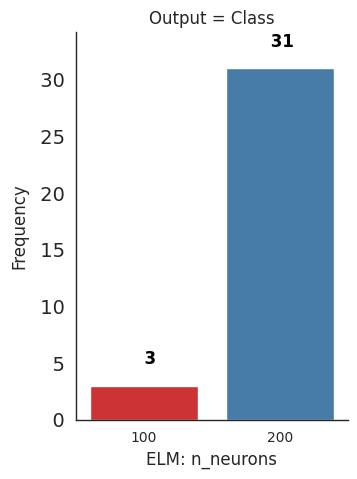

<Figure size 640x480 with 0 Axes>

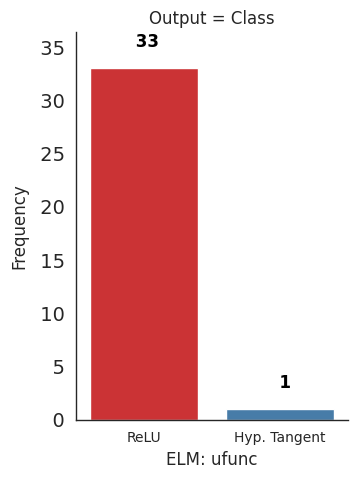

<Figure size 640x480 with 0 Axes>

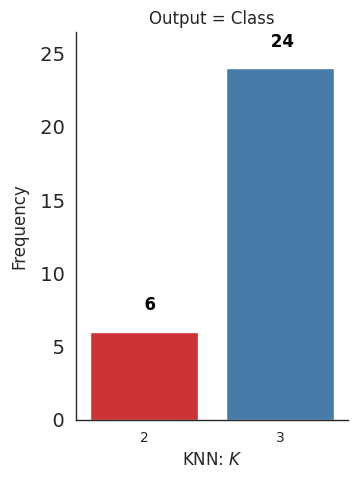

<Figure size 640x480 with 0 Axes>

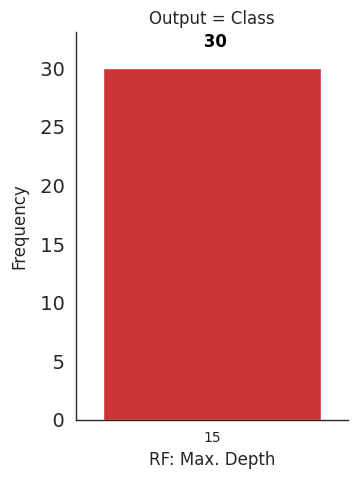

<Figure size 640x480 with 0 Axes>

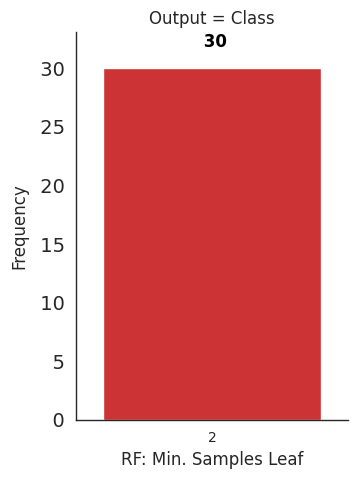

<Figure size 640x480 with 0 Axes>

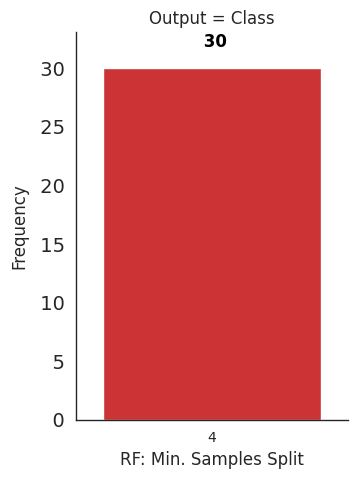

<Figure size 640x480 with 0 Axes>

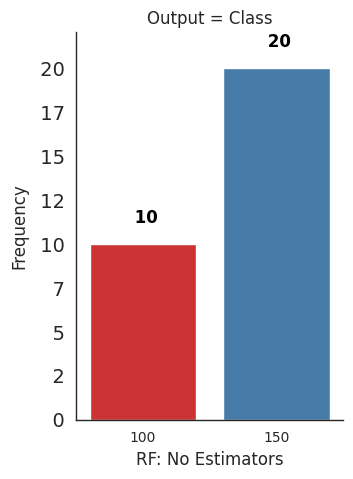

<Figure size 640x480 with 0 Axes>

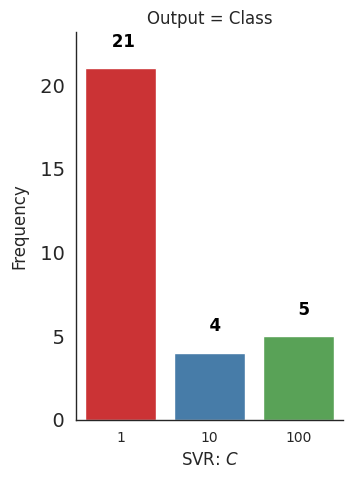

<Figure size 640x480 with 0 Axes>

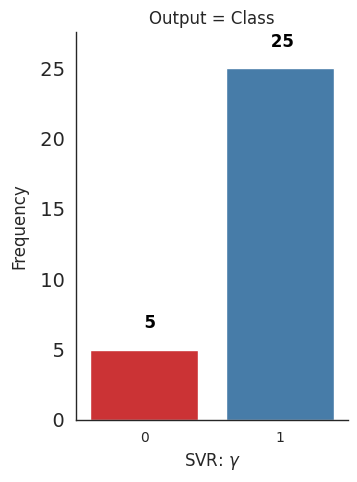

In [ ]:
for (e,t,d), df in parameters.groupby(['Estimator', 'Parameter','Dataset']):
    print ('='*80+'\n'+t+' - '+e+' - '+str(d)+'\n'+'='*80+'\n')
    pl.figure()
    if df['value'].unique().shape[0]<= 10:
        df['value']=df['value'].astype(int,errors='ignore',)
        kwargs={"linewidth": 1, 'edgecolor':None,}
        g = sns.catplot(x='value', col='Output', kind='count', data=df,
                                                col_wrap=4,
                        aspect=0.618, palette="Set1", **kwargs)
        fmtx='%3d'
        g.set_ylabels('Frequency')#(e+': Parameter '+t)
        g.fig.tight_layout()

        for ax in g.axes.ravel():
            ax.axes.set_xlabel(e+': Parameter '+t)
            ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=0, fontsize=10,)
            ax.set_ylim([0, 1.05*ax.get_ylim()[1]])
            ylabels = ['%3d'% x for x  in ax.get_yticks()]
            ax.set_yticklabels(ylabels,)# fontsize=16,)
            ax.set_xlabel(e+': '+t, )#fontsize=16,)

            #ax.set_xlabel('Day'); #ax.set_ylabel(m);

        for ax in g.axes.ravel():
            _h=[]
            for pat in ax.patches:
                _h.append(pat.get_height())

            _h=np.array(_h)
            _h=_h[~np.isnan(_h)]
            _h_max = np.max(_h)
            for pat in ax.patches:
                _h= 0 if np.isnan(pat.get_height()) else pat.get_height()
                pat.set_height(_h)
                ax.text(
                        x=pat.get_x() + pat.get_width()/2.,
                        #y=1.04*p.get_height(),
                        y=0.05*_h_max+pat.get_height(),
                        s=fmtx % pat.get_height(),
                        #fontsize=16,
                        color='black', ha='center',
                        va='bottom', rotation=0, weight='bold',
                       )
        #pl.legend( loc=10, borderaxespad=0., fontsize=16, )
        #pl.show()
    else:
        df['value']=df['value'].astype(float,errors='ignore',)
        kwargs={"linewidth": 1, 'aspect':0.4618,  'notch':1}
        #g = sns.catplot(x='value', y='Output', kind='box', data=df,  orient='h', palette=palette_color, **kwargs, )
        #xmin, xmax = g.ax.get_xlim()
        #g.ax.set_xlim(left=0, right=xmax)
        g = sns.catplot(y='value', x='Output', kind='box', data=df,  orient='v', palette="Set1", **kwargs, )
        #g.ax.set_xlabel(d+' -- '+e+': Parameter '+t, fontsize=16,)
        g.ax.set_xlabel(e+':'+t, )#fontsize=16,)
        g.ax.set_ylabel(d, rotation=90)
        g.ax.set_ylabel(None)#fontsize=16,)
        g.fig.tight_layout()
        #g.fig.set_figheight(4.00)
        #pl.xticks(rotation=45)
        #g.ax.set_ylabel(e+': Parameter '+t)
    fn = basename+'300dpi_comparison_datasets'+'_parameters_'+'__'+e+'__'+t+'__'+'.png'
    fn = re.sub('\^','', re.sub('\$','',fn))
    fn = re.sub('\(','', re.sub('\)','',fn))
    fn = re.sub(' ','_', re.sub('\/','',fn))
    fn = re.sub('\\\\','', re.sub('x.','x',fn))
    fn = re.sub('-','_', re.sub('\/','',fn)).lower()
    fn = fn.lower()
    #print(fn)
    pl.savefig(fn, transparent=True,
               bbox_inches='tight',
               dpi=300)